## Stackplot

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('data/sampleData2.csv',parse_dates=['Date'],index_col='Date')

In [3]:
df.head(5)

,Month,Year,Customer ID,Customer Age,Age Group,Customer Gender,Country,State,Product Category,Sub Category,Product,Frame Size,Order Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit
Date,,,,,,,,,,,,,,,,,,
2013-11-26,November,2013,11019,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,8,45,120,360,950,590
2015-11-26,November,2015,11019,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,8,45,120,360,950,590
2014-03-23,March,2014,11039,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,23,45,120,1035,2401,1366
2016-03-23,March,2016,11039,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,20,45,120,900,2088,1188
2014-05-15,May,2014,11046,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,4,45,120,180,418,238


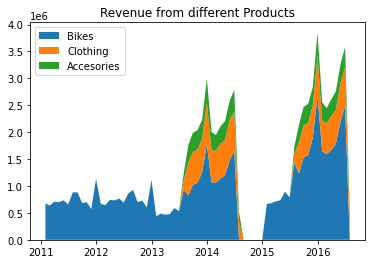

In [4]:
accessories = df[df['Product Category']=='Accessories'].Revenue.resample('M').sum().reindex(index=pd.date_range('01/01/2011','07/31/2016',freq='M')).fillna(0)
clothing = df[df['Product Category']=='Clothing'].Revenue.resample('M').sum().reindex(index=pd.date_range('01/01/2011','07/31/2016',freq='M')).fillna(0)
bikes = df[df['Product Category']=='Bikes'].Revenue.resample('M').sum().reindex(index=pd.date_range('01/01/2011','07/31/2016',freq='M')).fillna(0)

plt.stackplot(bikes.index,bikes,accessories,clothing)
plt.legend(['Bikes','Clothing','Accesories'],loc=2)
plt.title('Revenue from different Products')
plt.show()